In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### Step 1: Data Initialization

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/427/427_Project/Housing.csv')

print(data.head())

# Checking data types
print(data.dtypes)

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
price                int64
area                 int64
bedrooms             int64
bathrooms         

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Step 2: Data Visualization


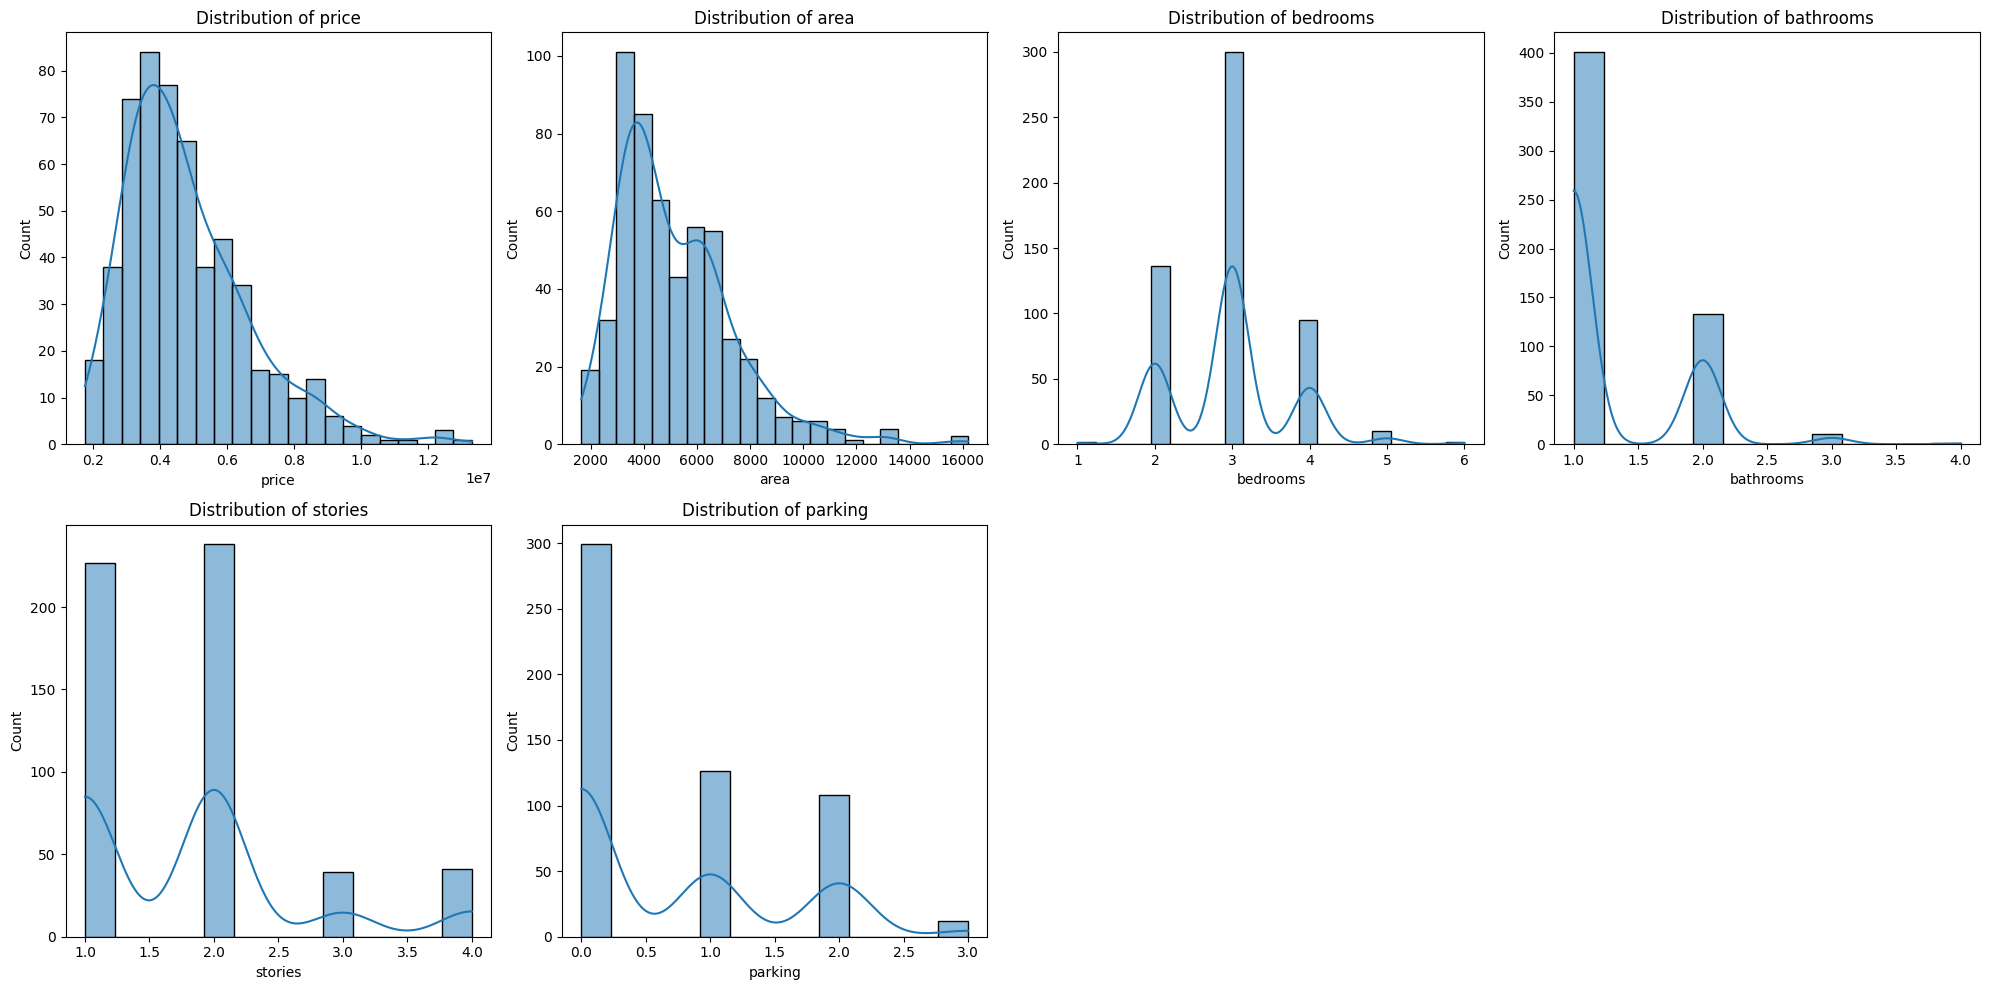

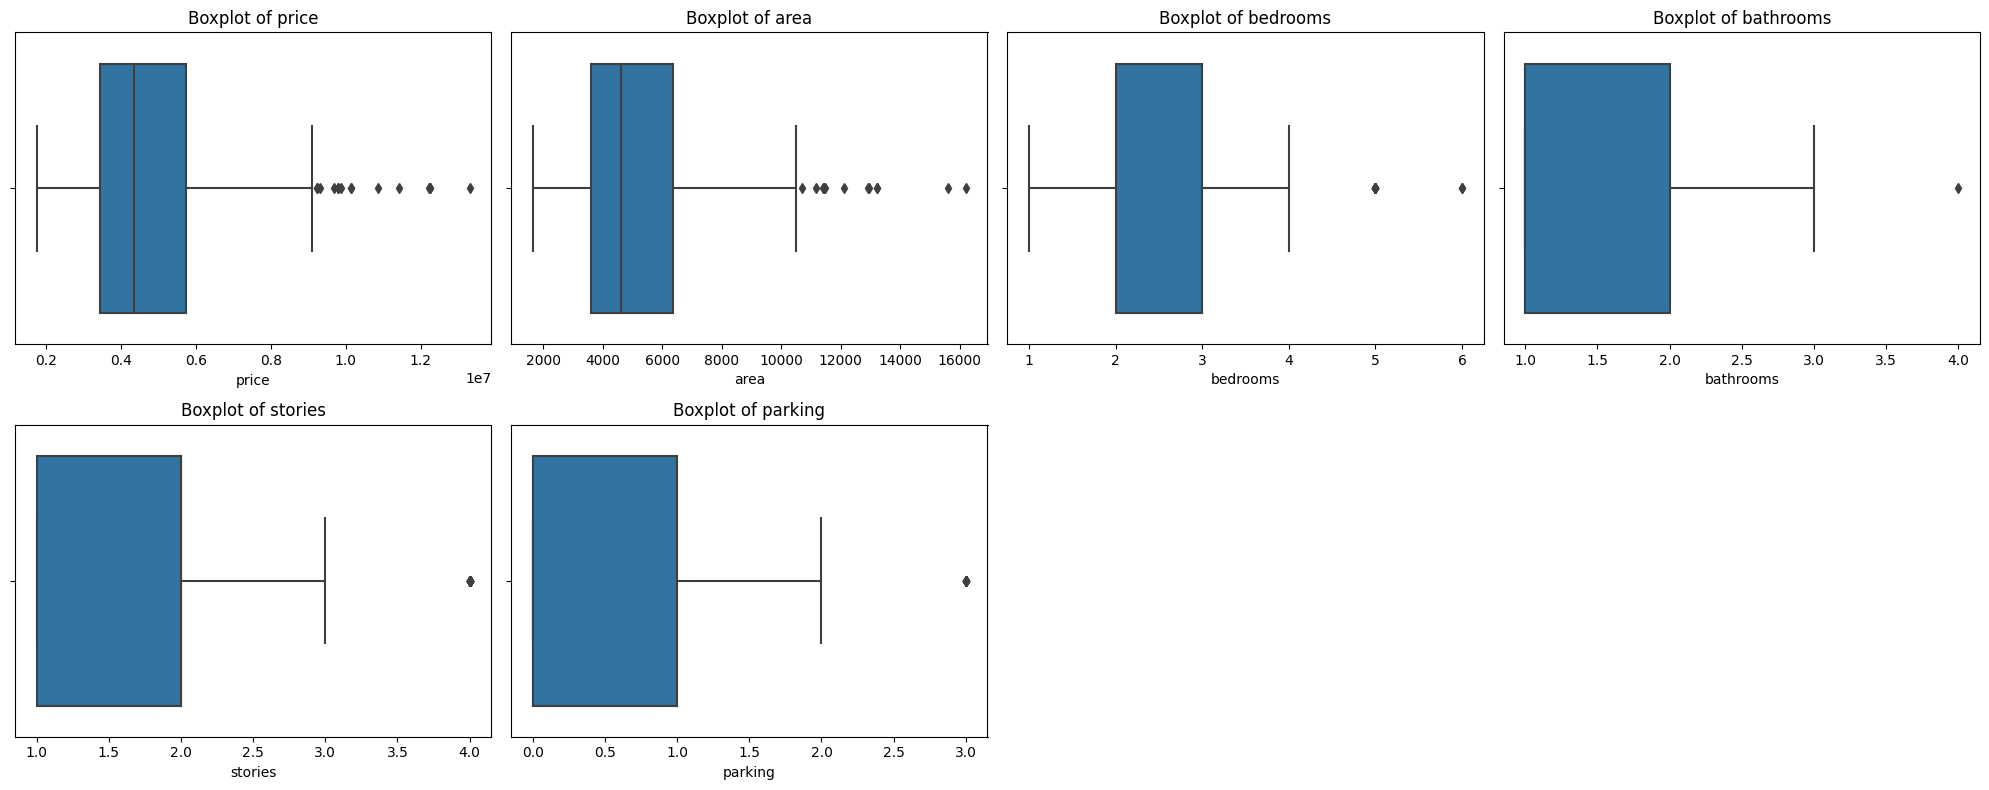

In [ ]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
num_plots = len(num_cols)
num_rows = (num_plots // 4) + (num_plots % 4 > 0)

plt.figure(figsize=(20, num_rows * 5))

for i, col in enumerate(num_cols):
    plt.subplot(num_rows, 4, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Boxplots for numerical features to identify outliers
plt.figure(figsize=(20, num_rows * 4))

for i, col in enumerate(num_cols):
    plt.subplot(num_rows, 4, i + 1)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

### Step 3: Data Preprocessing


In [ ]:
# Encoding binary variables
binary_columns = ['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
label_encoder = LabelEncoder()
for col in binary_columns:
  data[col] = label_encoder.fit_transform(data[col])

In [ ]:
# Dropping the Label column
X = data.drop(['price', 'furnishingstatus'], axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#checking the categories of categorical features
for col in data.select_dtypes(include=['object']).columns:
  print(f"Unique categories in {col}: {data[col].nunique()}")
  print(data[col].value_counts())

Unique categories in furnishingstatus: 3
semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64


In [ ]:
# Splitting the data into training and test sets
#80% training
#20% testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 4: Model Training and Validation

In [ ]:
# Initializing the models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'SVR': SVR()
}

# Training and evaluating the models
for name, model in models.items():
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  mse = mean_squared_error(y_test, predictions)
  r2 = r2_score(y_test, predictions)
  print(f"{name} - MSE: {mse}, R2: {r2}")

LinearRegression - MSE: 1800793719718.9673, R2: 0.6437296086614116
Ridge - MSE: 1803434954035.0925, R2: 0.6432070648669066
Lasso - MSE: 1800797221064.0198, R2: 0.6437289159526586
DecisionTree - MSE: 2850348429819.062, R2: 0.43608491110161873
RandomForest - MSE: 2002168444552.1233, R2: 0.6038894808131174
SVR - MSE: 5567931708587.371, R2: -0.10156381991077423


### Step 5: Model Evaluation

In [ ]:
for model_name, model in models.items():
  predictions = model.predict(X_test)

  mae = mean_absolute_error(y_test, predictions)
  mse = mean_squared_error(y_test, predictions)
  r2 = r2_score(y_test, predictions)

  print(f"{model_name} Performance:")
  print(f"  Mean Absolute Error: {mae}")
  print(f"  Mean Squared Error: {mse}")
  print(f"  R-Squared: {r2}\n")

LinearRegression Performance:
  Mean Absolute Error: 979112.2162187377
  Mean Squared Error: 1800793719718.9673
  R-Squared: 0.6437296086614116

Ridge Performance:
  Mean Absolute Error: 979608.5990976217
  Mean Squared Error: 1803434954035.0925
  R-Squared: 0.6432070648669066

Lasso Performance:
  Mean Absolute Error: 979113.4163446409
  Mean Squared Error: 1800797221064.0198
  R-Squared: 0.6437289159526586

DecisionTree Performance:
  Mean Absolute Error: 1260731.0397553518
  Mean Squared Error: 2850348429819.062
  R-Squared: 0.43608491110161873

RandomForest Performance:
  Mean Absolute Error: 1042150.2958205912
  Mean Squared Error: 2002168444552.1233
  R-Squared: 0.6038894808131174

SVR Performance:
  Mean Absolute Error: 1763890.175660213
  Mean Squared Error: 5567931708587.371
  R-Squared: -0.10156381991077423

